In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Importing the required libraries:

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,accuracy_score
import math
import seaborn as sns

# Importing Data:

In [3]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Analysis:

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
comp_data = pd.concat((train,test))
comp_data_1 = comp_data
comp_data.shape

(2919, 81)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

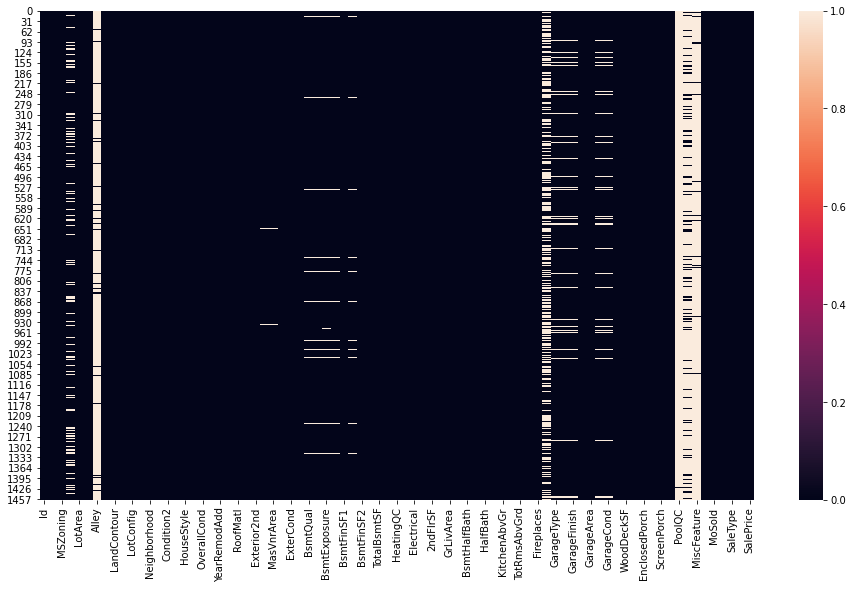

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

In [8]:
missing = train.isnull().sum() / len(train)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

# Training Data Missing Values Handling

In [9]:
## So from the above heatmap let us start the work of filling Missing Values:
train['LotFrontage'] = train['LotFrontage'] .fillna(train['LotFrontage'].mean())

In [10]:
## The alley feature has maximum missing values so lets drop it:
train.drop(['Alley'],axis=1,inplace=True)

In [11]:
## Now let us handle Bsmt features:
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [12]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])

In [13]:
## Let us work now all Garage features at once:
train.drop(['GarageYrBlt'],axis=1,inplace=True)
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [14]:
## Now let us drop all the highly missing values Columns:
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
train.shape

(1460, 76)

In [16]:
train.drop(['Id'],axis=1,inplace=True)

In [17]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
## There are some missing values left:
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

<AxesSubplot:>

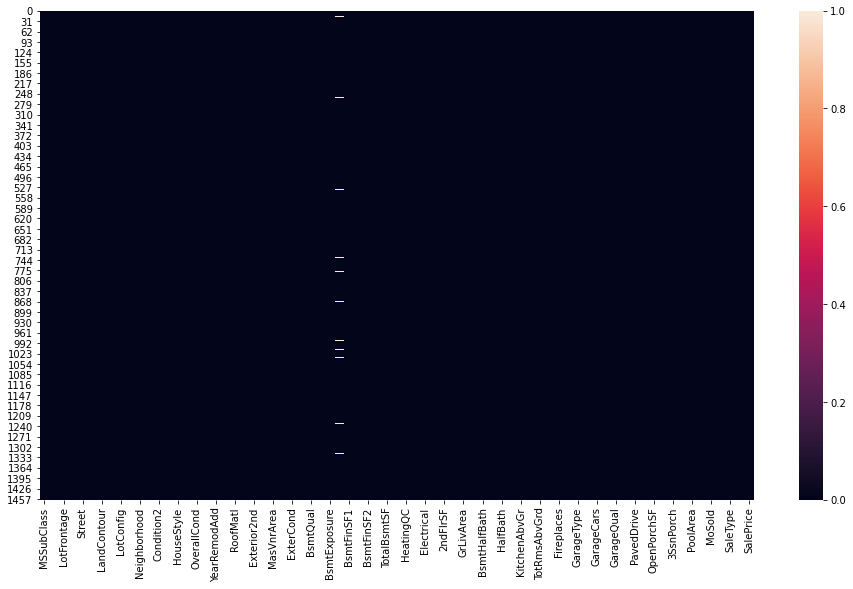

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

In [20]:
# Lets drop the leftover na values
train.dropna(inplace=True)

<AxesSubplot:>

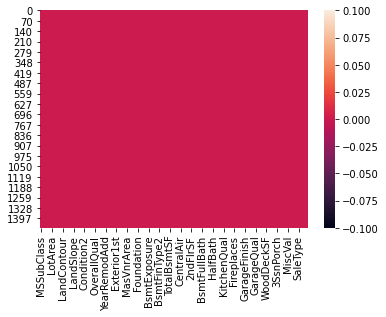

In [21]:
sns.heatmap(train.isnull())

## Handle Categorical Values:

In [22]:
# cat_val = train.select_dtypes(exclude=[np.number])
# cat_val.columns
cat_val = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
len(cat_val)

39

In [23]:
## With the help of OneHot Multivalues Encoding lets encode the data:
def onehot_encod(multcols):
  train_1 = train_2
  i = 0
  for cols in multcols:
    print(cols)
    train_3 = pd.get_dummies(train_2[cols],drop_first=True)
    train_2.drop([cols],axis=1,inplace=True)
    if i==0:
      train_1 = train_3.copy()
    else:
      train_1 = pd.concat((train_1,train_3))
    i+=1
  train_1 = pd.concat((train_2,train_1))
  return train_1

In [24]:
# Creating a copy of the cleaned data:
copy_train = train.copy()

## Training data Cleaning:

In [25]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

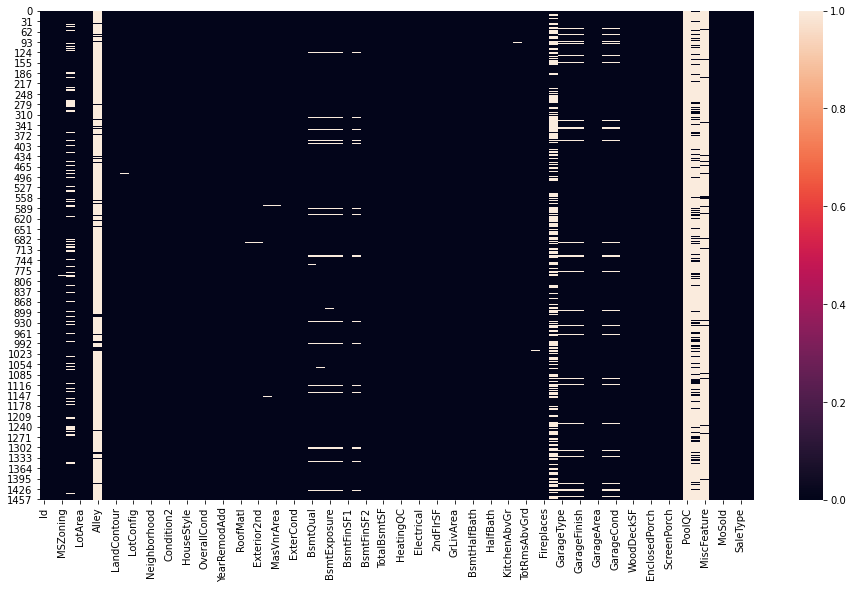

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull())

In [27]:
test['LotFrontage'] = test['LotFrontage'] .fillna(test['LotFrontage'].mean())
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test.drop(['Alley'],axis=1,inplace=True)
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test.drop(['GarageYrBlt'],axis=1,inplace=True)
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test.drop(['Id'],axis=1,inplace=True)

<AxesSubplot:>

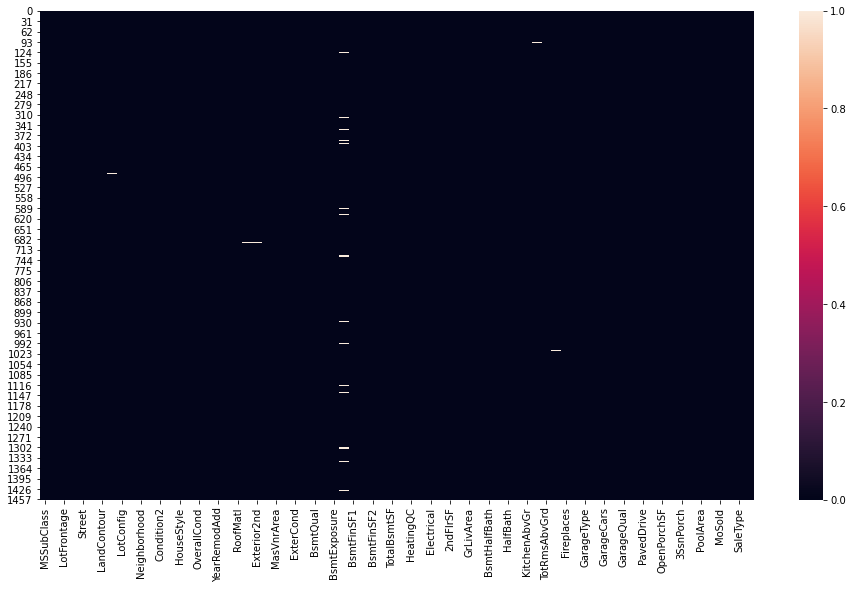

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(test.isnull())

In [29]:
## Lets check for some null values if any:
test.loc[:,test.isnull().any()].head()

,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [30]:
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])

In [31]:
test.shape

(1459, 74)

## Encoding:

In [32]:
# Concatenating the clean csv:
train_2 = pd.concat((train,test))

In [33]:
train_2['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [34]:
train_2.shape

(2881, 75)

In [35]:
# Now lets send it to OnehotEncoding:
train_2 = onehot_encod(cat_val)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [36]:
train_2.shape

(115240, 175)

In [37]:
## Now by deleting all the duplicate values:
train_2.drop_duplicates(inplace=True)
train_2.shape

(3085, 175)

In [38]:
train = train_2.iloc[:1422,:]
test = train_2.iloc[1422:2881,:]
print(train.shape)
test.shape

(1422, 175)


(1459, 175)

In [39]:
test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Applying Algorithm and Predictions:

In [40]:
X_train = train.drop(['SalePrice'],axis=1)
y_train = train['SalePrice']

In [41]:
test.tail()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1454,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,60.0,74.0,9627.0,7.0,5.0,1993.0,1994.0,94.0,758.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## XGBoost:

In [42]:
import xgboost as xgb
regressor = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.01,early_stopping_rounds=10)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(test)

[11:42:41] WARNING: ../src/learner.cc:573: 
Parameters: { "early_stopping_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [43]:
pred = pd.DataFrame(y_pred)
sub_file = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
xg_pred = pd.concat([sub_file['Id'],pred],axis=1)
xg_pred.columns=['Id','SalePrice']
xg_pred.to_csv('./xgbnono_O_2.csv',index=False)

# --------------------------------------------------------------------------